# **Imports**

In [53]:
# Standard libraries
import numpy as np
import pandas as pd

# Scikit-learn libraries
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Imbalanced-learn library
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

# Category encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder

# Custom libraries
from tools.EDA import EDA
from tools.FeatureEngineeringTool import FeatureEngineeringTool
from tools.SLModelTrainer import SLModelTrainer
from tools.SLModelEvaluator import SLModelEvaluator
from tools.DataLoader import DataLoader


# Custom PyTorch models
from models.PyTorchRegressor import PyTorchRegressor

# **Data Load**

In [54]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(request_type="local", path="./db/ConcreteStrengthData.csv")
df = data_loader.load_data()

# **EDA**

In [55]:
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

,Column,Has_Nulls,Dtype
CementComponent,CementComponent,False,float64
BlastFurnaceSlag,BlastFurnaceSlag,False,float64
FlyAshComponent,FlyAshComponent,False,float64
WaterComponent,WaterComponent,False,float64
SuperplasticizerComponent,SuperplasticizerComponent,False,float64
CoarseAggregateComponent,CoarseAggregateComponent,False,float64
FineAggregateComponent,FineAggregateComponent,False,float64
AgeInDays,AgeInDays,False,int64
Strength,Strength,False,float64



Dataset Shape:

(1030, 9)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
CementComponent,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAshComponent,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
WaterComponent,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
SuperplasticizerComponent,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregateComponent,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregateComponent,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
AgeInDays,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6



Missing Values:



CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64


Sample Data:



,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [56]:
eda.missing_values_percentage(target="Strength")

Percentage of Missing Values in Each Column:


,Column,Missing Percentage
0,CementComponent,0.0
1,BlastFurnaceSlag,0.0
2,FlyAshComponent,0.0
3,WaterComponent,0.0
4,SuperplasticizerComponent,0.0
5,CoarseAggregateComponent,0.0
6,FineAggregateComponent,0.0
7,AgeInDays,0.0



Summary of Missing Values:


,Average Missing Percentage,Median Missing Percentage,Maximum Missing Percentage,Minimum Missing Percentage,Standard Deviation of Missing Percentage,First Quartile (Q1) of Missing Percentage,Third Quartile (Q3) of Missing Percentage,Interquartile Range (IQR) of Missing Percentage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


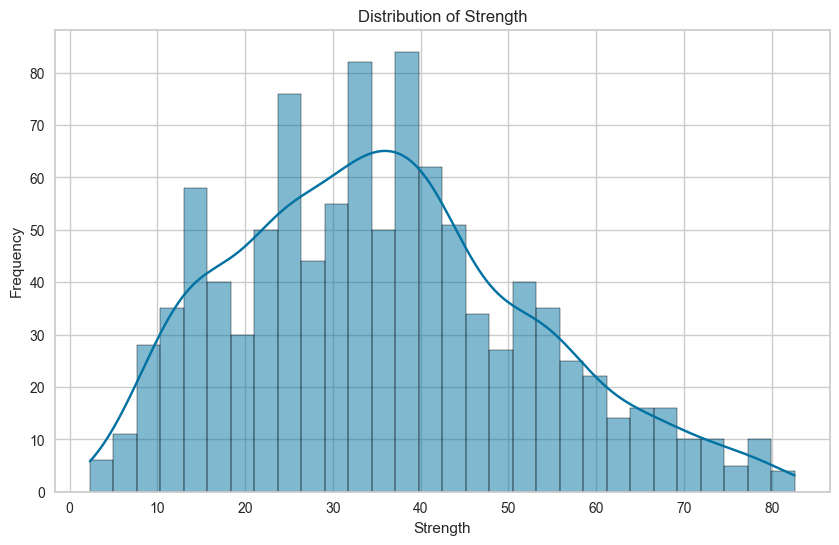

In [57]:
eda.plot_target_distribution("Strength")

# **Feature Engineering**

In [58]:
print(df.columns)

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [59]:
# fet = FeatureEngineeringTool(df)

# fet.add_count_feature(
#     [
#         "CementComponent ",
#         "BlastFurnaceSlag",
#         "FlyAshComponent",
#         "WaterComponent",
#         "SuperplasticizerComponent",
#         "CoarseAggregateComponent",
#         "FineAggregateComponent",
#     ]
# )


# df = fet.df

In [60]:
display(df)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [61]:
eda = EDA(df)

# **Histogram**

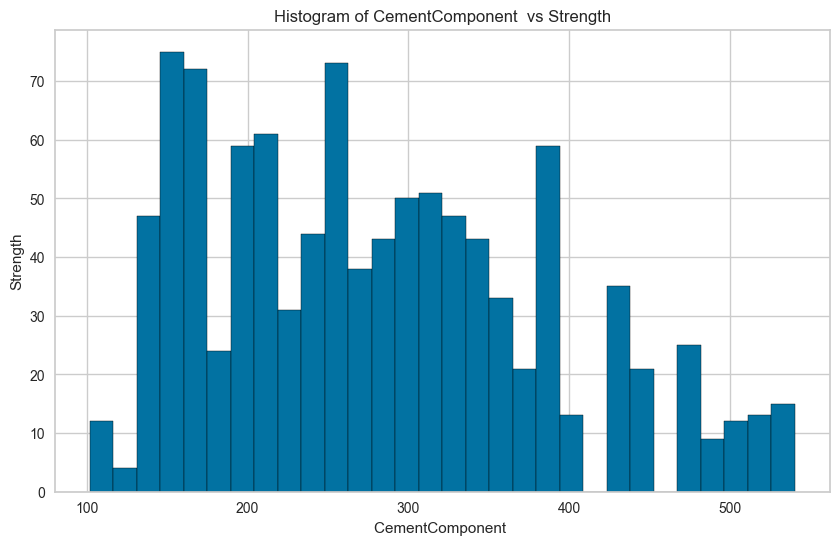

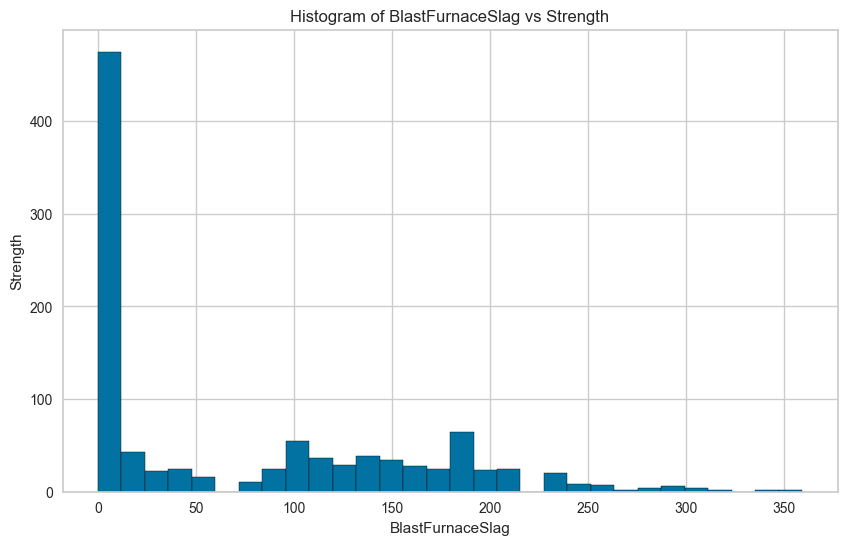

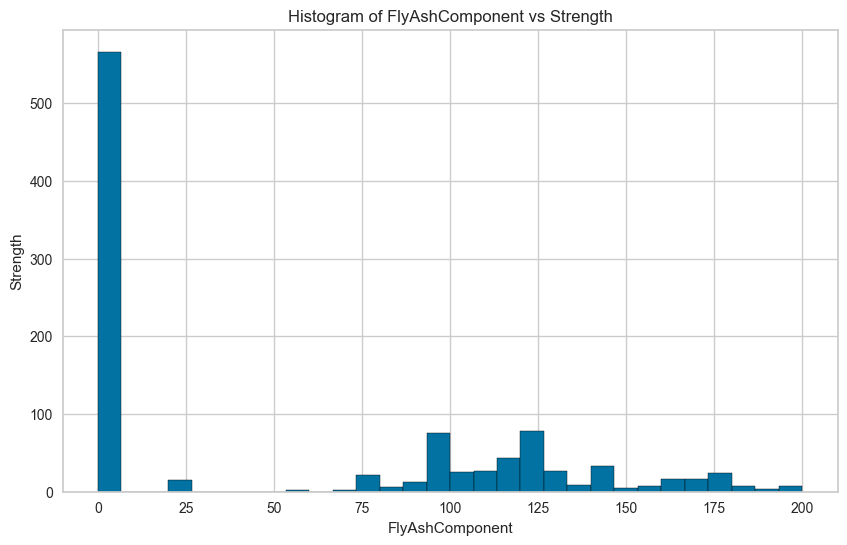

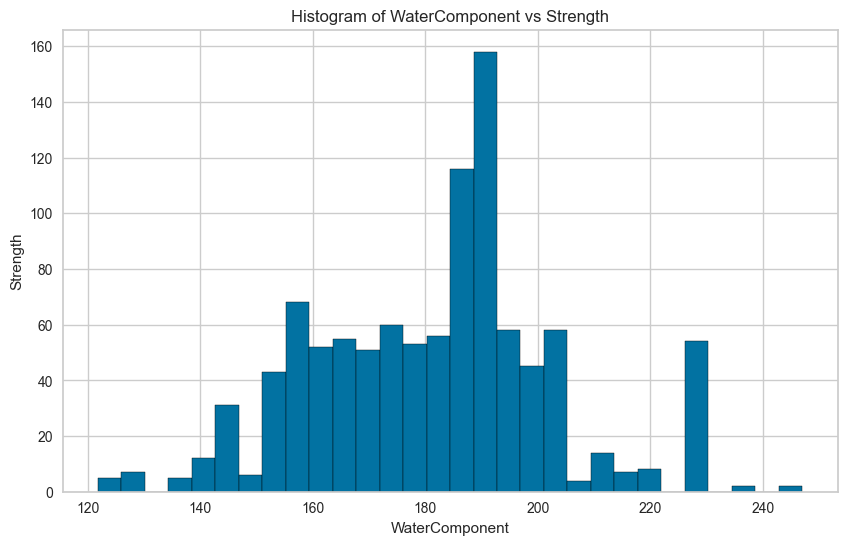

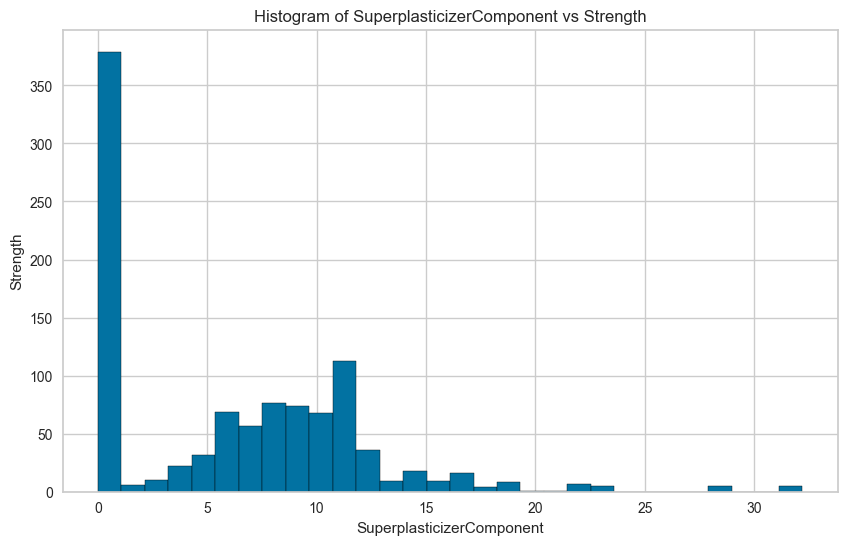

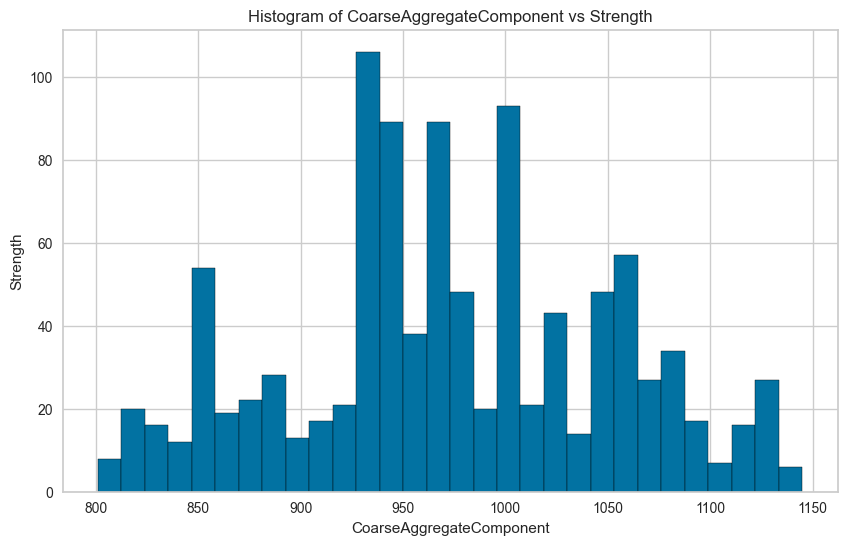

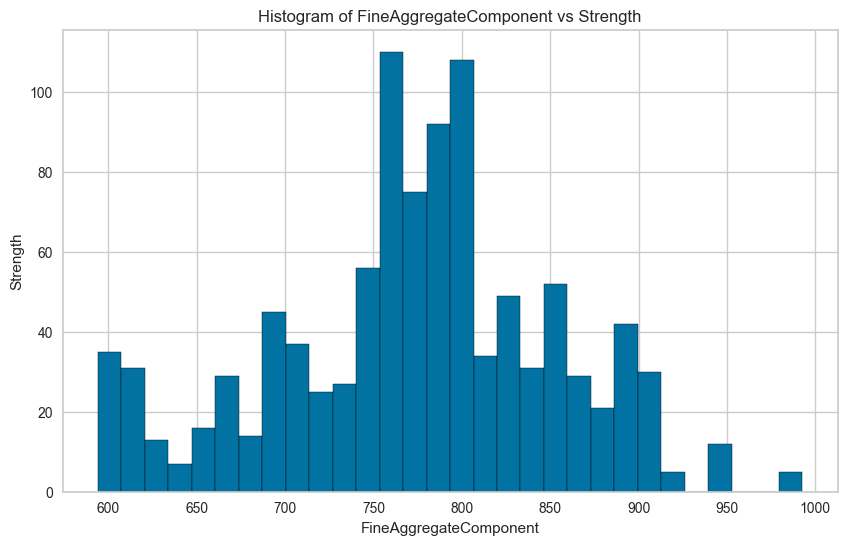

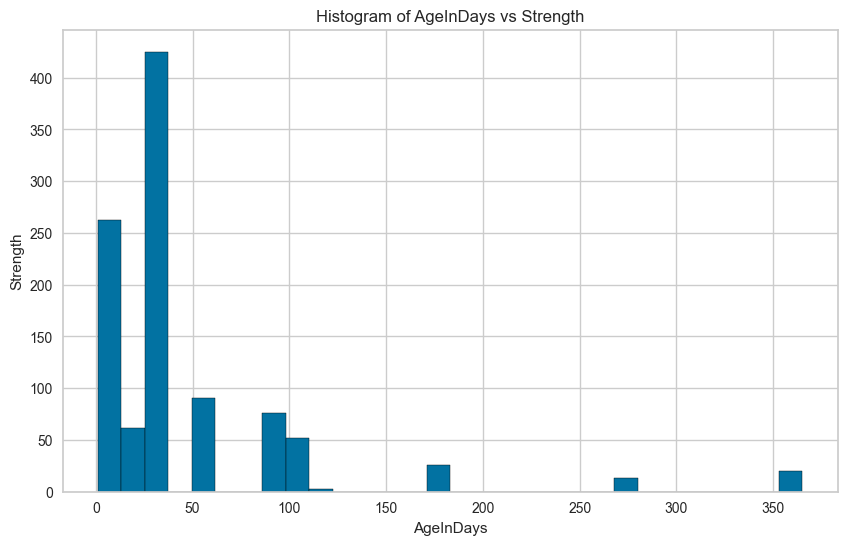

In [62]:
eda.plot_histogram(y="Strength")

# **CM & MI**

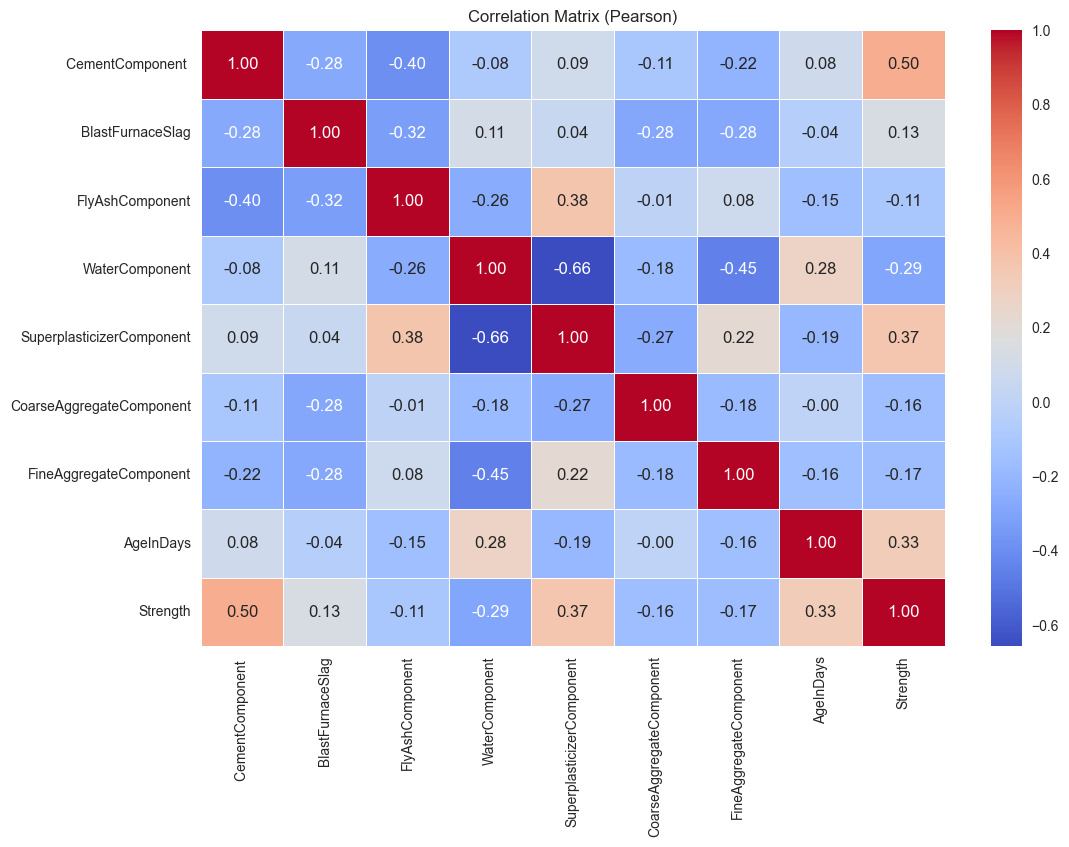

In [63]:
eda.plot_correlation_matrix(method="pearson")

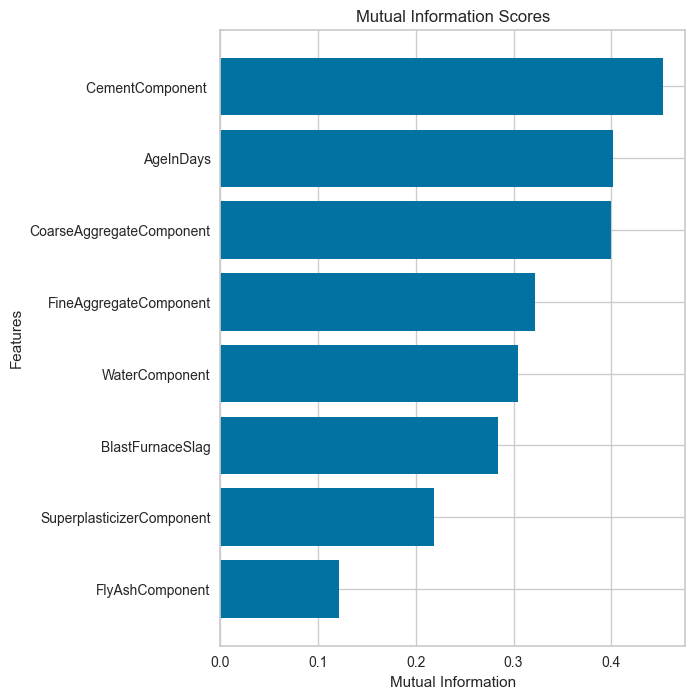

In [64]:
all_features = df.drop(columns=["Strength"]).columns.tolist()

eda.calculate_mutual_information(
    target="Strength", discrete_features=all_features, plot=True
)

# **Pipeline**

In [65]:
X = df.drop(columns=["Strength"])
y = df["Strength"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values.reshape(-1, 1))

X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values.reshape(-1, 1))

In [69]:
class ConcreteStrengthNN(nn.Module):
    def __init__(self, input_size):
        super(ConcreteStrengthNN, self).__init__()

        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [70]:
input_size = X_train.shape[1]

model = ConcreteStrengthNN(input_size)

optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [71]:
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [72]:
model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = criterion(y_pred, y_test_tensor)
    print("MSE:", mse.item())

MSE: 67.39456939697266


In [73]:
cat_transformer = Pipeline(
    steps=[
        # ("imputer", SimpleImputer(strategy="most_frequent")),
        # ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ("passthrough", "passthrough"),
    ]
)

num_transformer = Pipeline(
    steps=[
        # ('imputer', SimpleImputer(strategy='mean')),
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        (
            "cat",
            cat_transformer,
            make_column_selector(dtype_include=[object, "category"]),
        ),
    ],
    n_jobs=-1,
)

In [74]:
print(X_train.shape[1])

8


In [75]:
input_size = X_train.shape[1]

pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("regressor", PyTorchRegressor(input_size=input_size)),
    ]
)

In [76]:
param_grid = {
    "regressor__hidden_sizes": [[256, 128, 64]],
    "regressor__batch_size": [16],
    "regressor__lr": [0.01],
    "regressor__epochs": [100],
    "regressor__dropout_rate": [0.3],
    "regressor__optimizer_type": ["sgd"],
    "regressor__criterion_type": ["mse"],
}

In [77]:
pipelines = {"pytorch_regressor": pipeline}
param_grids = {"pytorch_regressor": param_grid}

# **Model Training**

In [78]:
model_trainer = SLModelTrainer(task_type="regression", device="cpu")

In [79]:
model_trainer.help()

=== PyTorchModelTrainer Help ===
This trainer supports both regression and classification tasks.

Available scoring metrics:
- For classification: accuracy, f1, precision, recall, balanced_accuracy
- For regression: r2, neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error

Usage:
You can specify the scoring parameter when calling the train method.
If you don't specify a scoring metric, the default will be 'accuracy' for classification and 'r2' for regression.
You can also check available scoring metrics in the sklearn documentation.


In [80]:
model_trainer.train(
    X_train,
    y_train,
    X_test,
    y_test,
    pipelines,
    param_grids,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=-1,
    error_score="None",
)

Task type: Regression
Using scoring metric: neg_mean_squared_error
Training on device: cpu
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [81]:
best_models = model_trainer.best_estimators
best_params = model_trainer.best_params
best_scores = model_trainer.best_scores
best_model_name = model_trainer.best_model_name

In [82]:
# print(best_models)
# print(best_params)
# print(best_scores)
# print(best_model_name)

# **Model Evaluator**

In [83]:
evaluator = SLModelEvaluator()

In [84]:
evaluator.visualize_pipeline(model_name=best_model_name, best_models=best_models)

Визуализация архитектуры модели: pytorch_regressor
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            2,304
├─ReLU: 1-2                              --
├─Dropout: 1-3                           --
├─Linear: 1-4                            32,896
├─ReLU: 1-5                              --
├─Dropout: 1-6                           --
├─Linear: 1-7                            8,256
├─ReLU: 1-8                              --
├─Dropout: 1-9                           --
├─Linear: 1-10                           65
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0


In [85]:
evaluator.display_results(
    X_valid=X_test,
    y_valid=y_test,
    best_models=best_models,
    best_params=best_params,
    best_scores=best_scores,
    best_model_name=best_model_name,
    task_type="regression",
    help_text=True,
)

Extracted PyTorch model: Sequential(
  (0): Linear(in_features=8, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=64, out_features=1, bias=True)
)
Model is on device: cpu
Evaluation Metrics for Validation Set:


,Model,R²,MAE,MAPE,MSE
0,pytorch_regressor,-1.080729,19.030566,0.500433,536.15567



Best Parameters for Each Model (found during cross-validation):


,Model,regressor__batch_size,regressor__criterion_type,regressor__dropout_rate,regressor__epochs,regressor__hidden_sizes,regressor__lr,regressor__optimizer_type
0,pytorch_regressor,16,mse,0.3,100,"[256, 128, 64]",0.01,sgd



Overall Best Model and Score (based on cross-validation score):


,Overall Best Model,Score (based on cross-validation score)
0,pytorch_regressor,-594.809357



Metric Explanations for Regression:
R²: Proportion of the variance explained by the model (higher is better).
MAE: Mean Absolute Error, average error magnitude (lower is better).
MAPE: Mean Absolute Percentage Error (lower is better).
MSE: Mean Squared Error (lower is better).


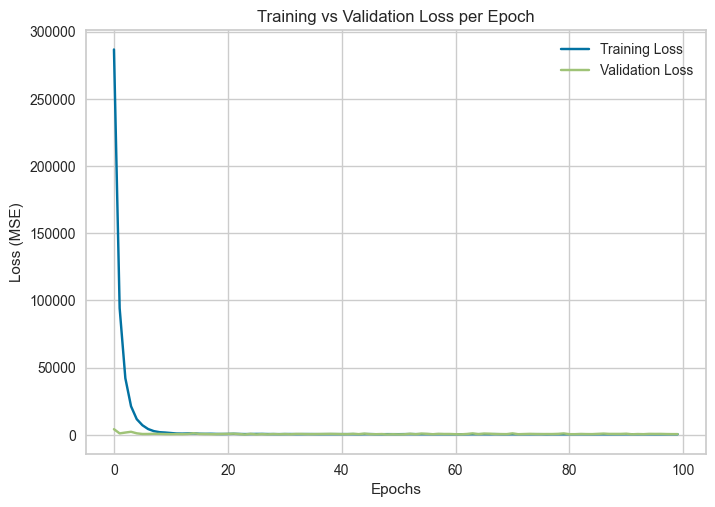

In [86]:
evaluator.plot_loss_history(best_models, best_model_name)

In [87]:
evaluator.validate_on_test(
    X_test=X_test,
    y_test=y_test,
    best_models=best_models,
    best_model_name=best_model_name,
    task_type="regression",
)

Results for the model on the test set:


,R²,MAE,MAPE,MSE
Model Evaluation,-1.080729,19.030566,0.500433,536.15567
